# Problem 1

In [1]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist

from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
def extract_top_30_features(model):
    """ Extract top 30 features per label class. """

    print('top 30 features for each label\n')
    for i in range(len(lr.coef_)):
        print('label', i, end=' - ')
        print(np.argsort(np.absolute(lr.coef_[i, :]))[:30])

def plot_confusion_matrix(validations, predictions):
    """ Plot confusion matrix and compare real labels with predicted labels. """

    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(10, 5))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def parse_spambase_dataset(filename):
    """ Exclusive for spambase data. """

    spambase_data, spambase_labels = [], []
    with open(filename) as f:
        line = f.readline()
        while line:
            elements = [float(v) for v in line.split(',')]
            vectors, label = elements[:-1], int(elements[-1])
            spambase_data.append(vectors)
            spambase_labels.append(label)
            line = f.readline()
    return np.array(spambase_data), spambase_labels

In [2]:
(X_train, y_train) , (X_test, y_test)= fashion_mnist.load_data()
X_train = normalize(X_train.flatten().reshape(60000, 784))
X_test = normalize(X_test.flatten().reshape(10000, 784))
LABELS = set(y_train)

print('X_train shape -', X_train.shape)
print('y_train shape -', y_train.shape)
print('Labels -', ', '.join([str(label) for label in LABELS]))

X_train shape - (60000, 784)
y_train shape - (60000,)
Labels - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9


In [3]:
lr = LogisticRegression(max_iter=20).fit(X_train, y_train)
predictions = lr.predict(X_test)

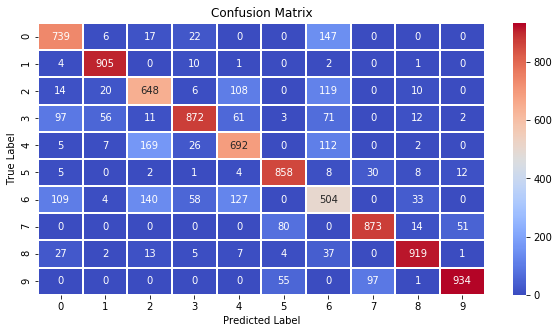

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       931
           1       0.91      0.98      0.94       923
           2       0.65      0.70      0.67       925
           3       0.87      0.74      0.80      1185
           4       0.69      0.68      0.69      1013
           5       0.86      0.92      0.89       928
           6       0.50      0.52      0.51       975
           7       0.87      0.86      0.87      1018
           8       0.92      0.91      0.91      1015
           9       0.93      0.86      0.90      1087

    accuracy                           0.79     10000
   macro avg       0.79      0.80      0.79     10000
weighted avg       0.80      0.79      0.79     10000



In [4]:
plot_confusion_matrix(predictions, y_test)
print(classification_report(predictions, y_test))

In [5]:
extract_top_30_features(lr)

top 30 features for each label

label 0 - [252   0 112  83  56  28 728 756  52   1  29  53  25  57 783  84  27 365
  26   4  85  54  21  24 757 700 433   2 308  55]
label 1 - [ 31   0   1  28   3  27  29  56 756   2 757  84  57 783  55  26 112  30
  59  85  83 140  25  58 728  60 758 168  54 111]
label 2 - [  1   0   2  28  27  29 756 755  56 728  55  26 508 783  84  57 182 579
 757 716 730 271 112 727  83 348  30 283 266   3]
label 3 - [ 28  27  32   1  56   0  31  29 783 756   2  84  55  57 352  26 112 520
   3   4  30 757  83 140  22  85 755  25 398  58]
label 4 - [  0  28   1  27 624 728 783 756  29  56   2  55 550  26 301 697  84 755
  57 782 112  83  30 757   3 404  25 414 754 140]
label 5 - [ 54   1   0  28 783  29  56   2  55 756  83 757 111  84  27 706  57   3
  30  26 112  82  25 758   4  85 328  58 755  53]
label 6 - [ 28  27  85 783 757   1   0 699 728 756 633  84  57 610  29 489  56  24
   2  26 112 751  55 755 270 254 113 309 405 700]
label 7 - [  0   1  28  27  56  29 57

In [30]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# categories = ['alt.atheism', 'talk.religion.misc','comp.graphics', 'sci.space']
X_train = fetch_20newsgroups(subset='train')
X_test = fetch_20newsgroups(subset='test')
y_train = X_train.target
y_test = X_test.target

LABELS = set(y_train)

X_train = vectorizer.fit_transform(X_train.data).todense()
X_test = vectorizer.transform(X_test.data).todense()
print('X_train shape -', X_train.shape)
print('y_train shape -', y_train.shape)
print('X_test shape -', X_test.shape)
print('y_test shape -', y_test.shape)
print('Labels -', LABELS)

X_train shape - (11314, 130107)
y_train shape - (11314,)
X_test shape - (7532, 130107)
y_test shape - (7532,)
Labels - {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


In [31]:
lr = LogisticRegression(max_iter=20).fit(X_train, y_train)

In [32]:
predictions = lr.predict(X_test)

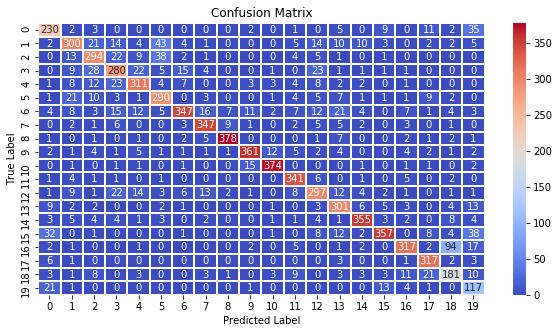

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       300
           1       0.77      0.68      0.72       440
           2       0.75      0.75      0.75       390
           3       0.71      0.72      0.72       391
           4       0.81      0.80      0.80       389
           5       0.73      0.81      0.77       360
           6       0.89      0.71      0.79       489
           7       0.88      0.90      0.89       387
           8       0.95      0.94      0.95       402
           9       0.91      0.88      0.89       410
          10       0.94      0.94      0.94       398
          11       0.86      0.94      0.90       363
          12       0.76      0.75      0.75       398
          13       0.76      0.86      0.80       352
          14       0.90      0.89      0.89       401
          15       0.90      0.77      0.83       464
          16       0.87      0.71      0.78       444
          17       0.84    

In [34]:
plot_confusion_matrix(predictions, y_test)
print(classification_report(predictions, y_test))

In [36]:
extract_top_30_features(lr)

top 30 features for each label

label 0 - [ 19633   6846   6845  19575  17485  19553  22949  22946  85564  57663
  65262  22740  84150  17513  19457  97573  83171   6762   6847 128126
   6860   6879 128886 124768 113094 128880  33136  33131  88160   1957]
label 1 - [  1957  97573  54013 128886 128880  17513 124768  17485  33573  33574
  14637  94563   7205 113094  81767   6879  86973  86972  22623  84150
  83171  50786  22740  22582  57663  13233  58992  59222  65262  88155]
label 2 - [ 70781 116251   1704  69293  63489  70879  82751 121848 125544  77733
  58543  25148  77960  50766  82937   1555  38957  53760  54764 117312
  96364  42857  95303  40516  90326  73574  64165  73573  44836  73266]
label 3 - [  1957   6847  85564   6860   6879  88160  33574  33573  17513  17485
 128886  78411  88155  59973  50786  97573 113094  81767   6846 128880
   6845  22946  22332  59222  19553  83171  19575  22582  19633  19634]
label 4 - [ 22946  54013  33573  33574  86403  94563  78411  22582  5997

In [41]:
spambase_data, spambase_labels = parse_spambase_dataset('spambase.data')
spambase_data, spambase_labels = shuffle(spambase_data, spambase_labels)

In [42]:
X_train, y_train = spambase_data[:4000], spambase_labels[:4000]
X_test, y_test = spambase_data[4000:], spambase_labels[4000:]
LABELS = set(y_train)
print('X_train shape -', X_train.shape)
print('y_train shape -', len(y_train))
print('X_test shape -', X_test.shape)
print('y_test shape -', len(y_test))
print('Labels -', LABELS)

X_train shape - (4000, 57)
y_train shape - 4000
X_test shape - (601, 57)
y_test shape - 601
Labels - {0, 1}


In [43]:
lr = LogisticRegression(max_iter=100).fit(X_train, y_train)
predictions = lr.predict(X_test)

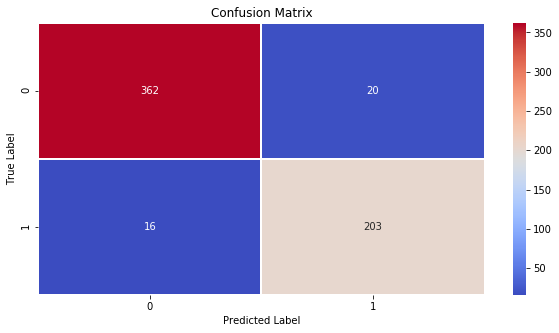

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       382
           1       0.91      0.93      0.92       219

    accuracy                           0.94       601
   macro avg       0.93      0.94      0.94       601
weighted avg       0.94      0.94      0.94       601



In [44]:
plot_confusion_matrix(predictions, y_test)
print(classification_report(predictions, y_test))

In [45]:
extract_top_30_features(lr)

top 30 features for each label

label 0 - [56 55 54 35  1 18 27 11 49 50 10 46  2  0 20 37  9 21 39 13 12 31 33  3
 53 42 17 14 47 30]


# Problem 2

In [3]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [12]:
(X_train, y_train) , (X_test, y_test)= fashion_mnist.load_data()
X_train = normalize(X_train.flatten().reshape(60000, 784))
X_test = normalize(X_test.flatten().reshape(10000, 784))
LABELS = set(y_train)

print('X_train shape -', X_train.shape)
print('y_train shape -', y_train.shape)
print('Labels -', ', '.join([str(label) for label in LABELS]))

X_train shape - (60000, 784)
y_train shape - (60000,)
Labels - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9


### D=5 features on MNIST

In [13]:
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print('X_train shape -', X_train.shape, '(after pca)')
print('X_test shape -', X_test.shape, '(after pca)')

X_train shape - (60000, 5) (after pca)
X_test shape - (10000, 5) (after pca)


In [14]:
lr = LogisticRegression(max_iter=20).fit(X_train, y_train)
predictions = lr.predict(X_test)

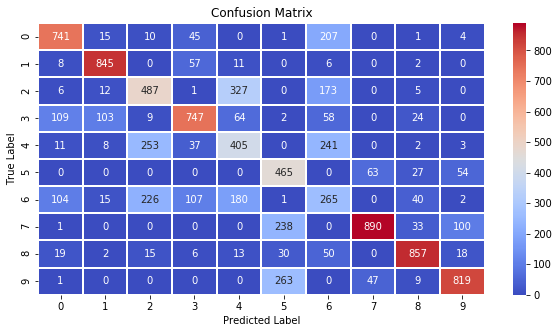

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1024
           1       0.84      0.91      0.88       929
           2       0.49      0.48      0.48      1011
           3       0.75      0.67      0.71      1116
           4       0.41      0.42      0.41       960
           5       0.47      0.76      0.58       609
           6       0.27      0.28      0.27       940
           7       0.89      0.71      0.79      1262
           8       0.86      0.85      0.85      1010
           9       0.82      0.72      0.77      1139

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.67      0.65      0.66     10000



In [15]:
plot_confusion_matrix(predictions, y_test)
print(classification_report(predictions, y_test))

### D=20 features on MNIST

In [60]:
pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print('X_train shape -', X_train.shape, '(after pca)')
print('X_test shape -', X_test.shape, '(after pca)')

X_train shape - (60000, 20) (after pca)
X_test shape - (10000, 20) (after pca)


In [61]:
lr = LogisticRegression(max_iter=20).fit(X_train, y_train)
predictions = lr.predict(X_test)

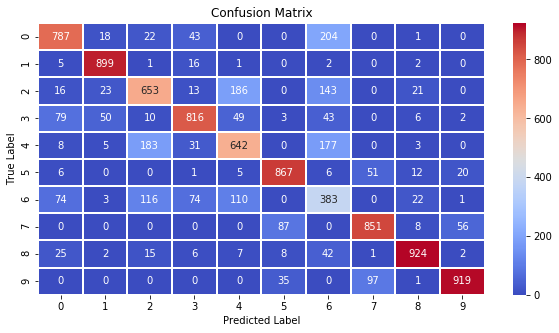

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1075
           1       0.90      0.97      0.93       926
           2       0.65      0.62      0.64      1055
           3       0.82      0.77      0.79      1058
           4       0.64      0.61      0.63      1049
           5       0.87      0.90      0.88       968
           6       0.38      0.49      0.43       783
           7       0.85      0.85      0.85      1002
           8       0.92      0.90      0.91      1032
           9       0.92      0.87      0.90      1052

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.78      0.77      0.78     10000



In [62]:
plot_confusion_matrix(predictions, y_test)
print(classification_report(predictions, y_test))

## PCA on Spambase

In [9]:
spambase_data, spambase_labels = parse_spambase_dataset('spambase.data')
spambase_data, spambase_labels = shuffle(spambase_data, spambase_labels)

In [10]:
X_train, y_train = spambase_data[:4000], spambase_labels[:4000]
X_test, y_test = spambase_data[4000:], spambase_labels[4000:]
LABELS = set(y_train)
print('X_train shape -', X_train.shape)
print('y_train shape -', len(y_train))
print('X_test shape -', X_test.shape)
print('y_test shape -', len(y_test))
print('Labels -', LABELS)

X_train shape - (4000, 57)
y_train shape - 4000
X_test shape - (601, 57)
y_test shape - 601
Labels - {0, 1}


In [11]:
def run_pca(X_train, X_test, n_components):
    """ Run Principal Component Analysis given the number of components. """
    
    pca = PCA(n_components=n_components)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    return X_train, X_test

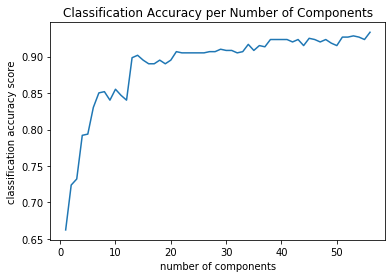

In [15]:
components_nums, accuracy_scores = [], []
for n_components in range(1, len(X_train[0])):
    X_pca_train, X_pca_test = run_pca(X_train, X_test, n_components)
    lr = LogisticRegression(max_iter=100).fit(X_pca_train, y_train)
    predictions = lr.predict(X_pca_test)
    components_nums.append(n_components)
    accuracy_scores.append(accuracy_score(y_test, predictions))

plt.title('Classification Accuracy per Number of Components')
plt.xlabel('number of components')
plt.ylabel('classification accuracy score')
plt.plot(components_nums, accuracy_scores)

# Problem 3

In [31]:
(X_train, y_train) , (X_test, y_test)= fashion_mnist.load_data()
X_train = normalize(X_train.flatten().reshape(60000, 784))
X_test = normalize(X_test.flatten().reshape(10000, 784))
LABELS = set(y_train)

print('X_train shape -', X_train.shape)
print('y_train shape -', y_train.shape)
print('Labels -', ', '.join([str(label) for label in LABELS]))

X_train shape - (60000, 784)
y_train shape - (60000,)
Labels - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9


In [32]:
X_test.shape

(10000, 784)

In [37]:
from numpy.linalg import eig

def run_implemented_pca(X_train, X_test, n_components):
    # calculate the mean of each column
    mean = np.mean(X_train, axis=0)
    # center columns by subtracting column means
    X_train_centered = X_train - mean
    X_test_centered = X_test - mean
    # calculate covariance matrix of centered matrix
    covariance_matrix = np.cov(X_train_centered.T)
    # eigendecomposition of covariance matrix
    values, vectors = eig(covariance_matrix)
    # project data
    X_train_projected = vectors.T.dot(X_train_centered.T)
    X_test_projected = vectors.T.dot(X_test_centered.T)

    X_train_projected = X_train_projected.T
    X_test_projected = X_test_projected.T
    return X_train_projected[:,:n_components], X_test_projected[:,:n_components]

In [49]:
X_train_pca, X_test_pca = run_implemented_pca(X_train, X_test, 5)
lr = LogisticRegression(max_iter=100).fit(X_train_pca, y_train)
predictions = lr.predict(X_test_pca)
print('accuracy on MNIST after PCA with 5 components -', accuracy_score(y_test, predictions))

accuracy on MNIST after PCA with 5 components - 0.6614


In [50]:
X_train_pca, X_test_pca = run_implemented_pca(X_train, X_test, 20)
lr = LogisticRegression(max_iter=100).fit(X_train_pca, y_train)
predictions = lr.predict(X_test_pca)
print('accuracy on MNIST after PCA with 5 components -', accuracy_score(y_test, predictions))

accuracy on MNIST after PCA with 5 components - 0.7931


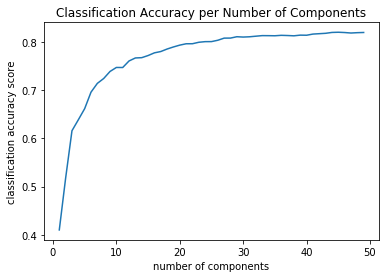

In [41]:
components_nums, accuracy_scores = [], []
for n_components in range(1, 50):
    X_pca_train, X_pca_test = run_implemented_pca(X_train, X_test, n_components)
    lr = LogisticRegression(max_iter=100).fit(X_pca_train, y_train)
    predictions = lr.predict(X_pca_test)
    components_nums.append(n_components)
    accuracy_scores.append(accuracy_score(y_test, predictions))

plt.title('Classification Accuracy per Number of Components')
plt.xlabel('number of components')
plt.ylabel('classification accuracy score')
plt.plot(components_nums, accuracy_scores)

In [6]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# categories = ['alt.atheism', 'talk.religion.misc','comp.graphics', 'sci.space']
X_train = fetch_20newsgroups(subset='train')
X_test = fetch_20newsgroups(subset='test')
y_train = X_train.target
y_test = X_test.target

LABELS = set(y_train)

X_train = vectorizer.fit_transform(X_train.data).todense()
X_test = vectorizer.transform(X_test.data).todense()
print('X_train shape -', X_train.shape)
print('y_train shape -', y_train.shape)
print('X_test shape -', X_test.shape)
print('y_test shape -', y_test.shape)
print('Labels -', LABELS)

X_train shape - (11314, 130107)
y_train shape - (11314,)
X_test shape - (7532, 130107)
y_test shape - (7532,)
Labels - {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


In [3]:
from sklearn.feature_selection import SelectKBest, chi2

skb = SelectKBest(chi2, k=200)
X_train = skb.fit_transform(X_train, y_train)
X_test = skb.transform(X_test)
print('X_train shape -', X_train.shape, '(after feature selection using Chi2 criteria)')
print('X_test shape -', X_test.shape, '(after feature selection using Chi2 criteria)')

X_train shape - (11314, 200) (after feature selection using Chi2 criteria)
X_test shape - (7532, 200) (after feature selection using Chi2 criteria)


In [4]:
lr = LogisticRegression(max_iter=100).fit(X_train, y_train)
predictions = lr.predict(X_test)

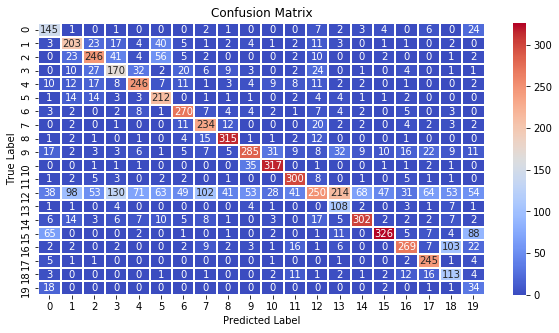

              precision    recall  f1-score   support

           0       0.45      0.74      0.56       196
           1       0.52      0.63      0.57       323
           2       0.62      0.62      0.62       394
           3       0.43      0.54      0.48       312
           4       0.64      0.69      0.67       354
           5       0.54      0.80      0.64       264
           6       0.69      0.83      0.76       325
           7       0.59      0.79      0.68       295
           8       0.79      0.88      0.84       356
           9       0.72      0.58      0.64       491
          10       0.79      0.88      0.83       361
          11       0.76      0.90      0.82       332
          12       0.64      0.16      0.26      1548
          13       0.27      0.81      0.41       133
          14       0.77      0.75      0.76       402
          15       0.82      0.64      0.72       513
          16       0.74      0.60      0.66       447
          17       0.65    

In [7]:
plot_confusion_matrix(predictions, y_test)
print(classification_report(predictions, y_test))

In [7]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

skb = SelectKBest(mutual_info_regression, k=200)
X_train = skb.fit_transform(X_train, y_train)
X_test = skb.transform(X_test)
print('X_train shape -', X_train.shape, '(after feature selection using Mutual Info criteria)')
print('X_test shape -', X_test.shape, '(after feature selection using Mutual Info criteria)')

In [ ]:
lr = LogisticRegression(max_iter=100).fit(X_train, y_train)
predictions = lr.predict(X_test)

In [ ]:
plot_confusion_matrix(predictions, y_test)
print(classification_report(predictions, y_test))